In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import proceso_imagenes
import matplotlib.pyplot as plt

imagenes, clases = proceso_imagenes.cargar_numeros("./nums")



In [ ]:
import numpy as np

diccionario_numero_rectas = dict([ (key,[]) for key in range(0,10)])

numero_rectas = np.fromiter(map(proceso_imagenes.contar_rectas,imagenes[:500]),dtype=int)

for num, cl in zip(numero_rectas,clases):
    diccionario_numero_rectas[cl].append(num)
    #print("Numero:",cl,"numero rectas",num)

for key, value in diccionario_numero_rectas.items():
    print(key,np.mean(value),np.std(value))

In [ ]:
diccionario_intensidades = dict([ (key,[]) for key in range(0,10)])

intensidades_medias = np.fromiter(map(proceso_imagenes.intensidad_media, imagenes[:500]),dtype=int)

for num, cl in zip(intensidades_medias,clases):
    diccionario_intensidades[cl].append(num)
    #print("Numero:",cl,"intwensidad",num)

for key, value in diccionario_intensidades.items():
    print(key,np.mean(value),np.std(value))

In [ ]:
diccionario_intensidades_umbralizadas = dict([ (key,[]) for key in range(0,10)])

intensidades_medias_umbralizadas = np.fromiter(map(proceso_imagenes.intensidad_media_umbralizada,imagenes[:500]),
                                               dtype=int)

for num, cl in zip(intensidades_medias_umbralizadas,clases):
    diccionario_intensidades_umbralizadas[cl].append(num)
    #print("Numero:",cl,"intwensidad",num)

for key, value in diccionario_intensidades_umbralizadas.items():
    print(key,np.mean(value),np.std(value))

In [ ]:
diccionario_intensidades_median = dict([ (key,[]) for key in range(0,10)])

intensidades_median = np.fromiter(map(proceso_imagenes.intensidad_mediana, imagenes[:500]),dtype=int)

for num, cl in zip(intensidades_median,clases):
    diccionario_intensidades_median[cl].append(num)
    #print("Numero:",cl,"intwensidad",num)

for key, value in diccionario_intensidades_median.items():
    print(key,np.mean(value),np.std(value))

In [ ]:
diccionario_intensidades_median_umbralizada = dict([ (key,[]) for key in range(0,10)])

intensidades_median_umbralizada = np.fromiter(map(proceso_imagenes.intensidad_mediana_umbralizada, imagenes[:500]),dtype=int)

for num, cl in zip(intensidades_median_umbralizada,clases):
    diccionario_intensidades_median_umbralizada[cl].append(num)
    #print("Numero:",cl,"intwensidad",num)

for key, value in diccionario_intensidades_median_umbralizada.items():
    print(key,np.mean(value),np.std(value))

In [ ]:
diccionario_altos = dict([ (key,[]) for key in range(0,10)])
diccionario_anchos = dict([ (key,[]) for key in range(0,10)])

altos = np.fromiter(map(proceso_imagenes.alto_numero, imagenes[:500]),dtype=int)
anchos = np.fromiter(map(proceso_imagenes.ancho_numero, imagenes[:500]),dtype=int)

for al,an, cl in zip(altos,anchos,clases):
    diccionario_altos[cl].append(al)
    diccionario_anchos[cl].append(an)
    #print("Numero:",cl,"intwensidad",num)

for key, value in diccionario_altos.items():
    print(key,np.mean(value),np.std(value))
    
for key, value in diccionario_anchos.items():
    print(key,np.mean(value),np.std(value))

In [137]:
#n_rectas altos anchos i_m i_m_u
from functools import reduce
size_dataset = 100

numero_rectas = np.fromiter(map(proceso_imagenes.contar_rectas,imagenes[:size_dataset]),dtype=int)
altos = np.fromiter(map(proceso_imagenes.alto_numero, imagenes[:size_dataset]),dtype=int)
anchos = np.fromiter(map(proceso_imagenes.ancho_numero, imagenes[:size_dataset]),dtype=int)
intensidades_medias_umbralizadas = np.fromiter(map(proceso_imagenes.intensidad_media_umbralizada,imagenes[:size_dataset]),
                                               dtype=int)
intensidades_medias = np.fromiter(map(proceso_imagenes.intensidad_media, imagenes[:size_dataset]),dtype=int)
u = np.asarray(list(map(proceso_imagenes.proyeccion_y,imagenes[:size_dataset])))
v = np.asarray(list(map(proceso_imagenes.proyeccion_x,imagenes[:size_dataset]))) 

/opt/anaconda3-4.4.0/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [121]:
dataset = reduce(lambda x,y: np.vstack((x,y)),[numero_rectas,altos,anchos,intensidades_medias,intensidades_medias_umbralizadas]).T
print(u.shape)
print(dataset.shape)

dataset = reduce(lambda x,y: np.hstack((x,y)),[dataset,u,v])

print(dataset.shape)

(500, 402)
(500, 5)
(500, 709)


0


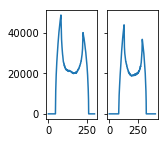

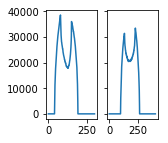

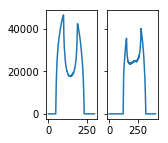

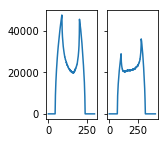

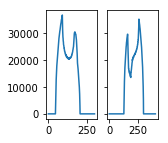

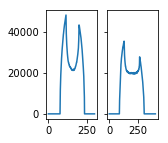

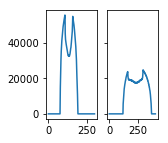

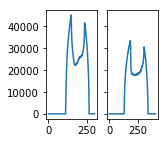

1


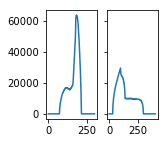

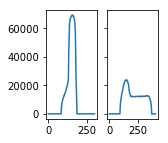

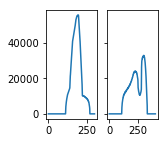

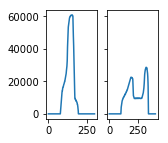

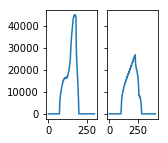

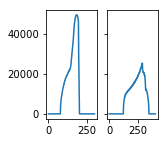

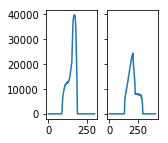

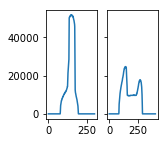

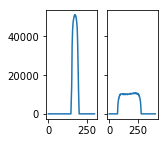

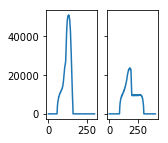

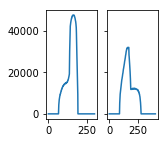

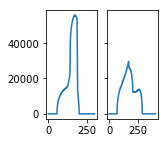

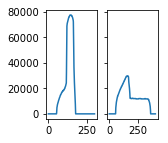

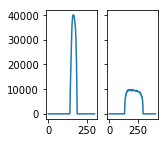

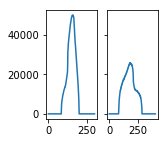

2


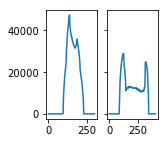

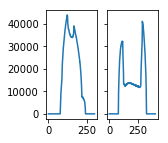

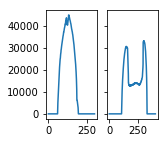

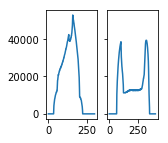

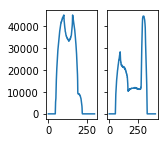

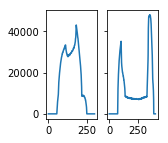

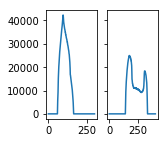

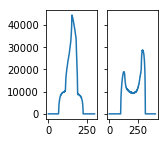

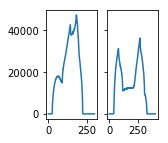

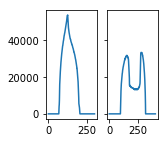

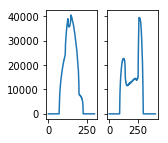

3


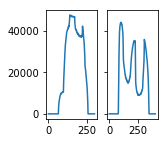

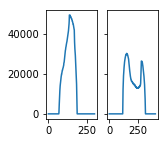

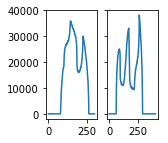

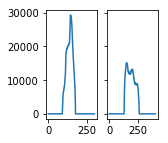

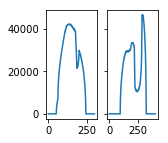

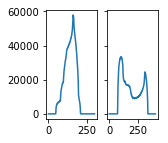

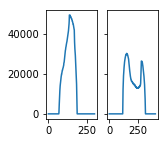

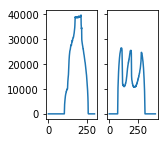

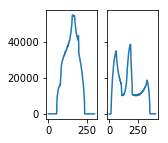

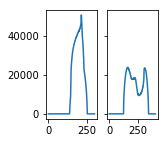

4


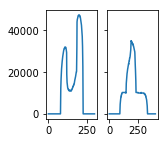

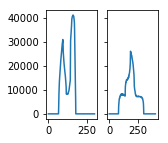

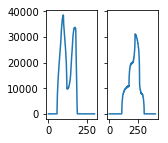

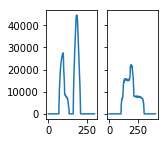

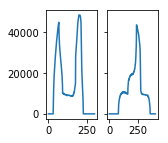

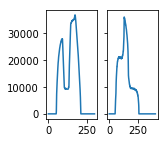

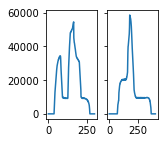

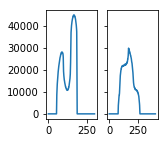

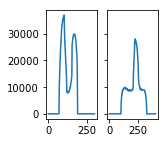

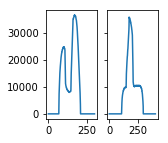

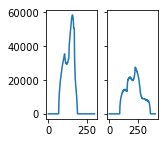

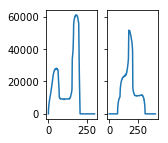

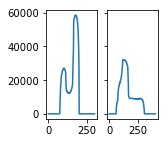

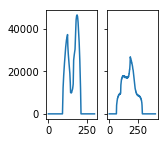

5


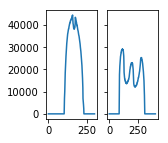

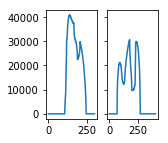

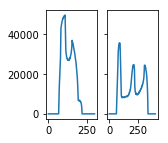

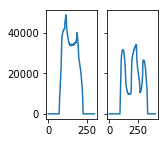

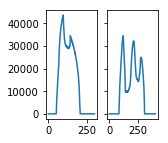

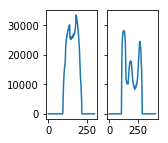

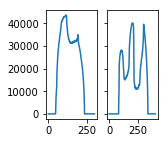

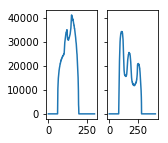

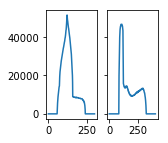

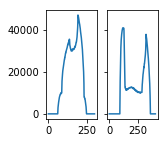

6


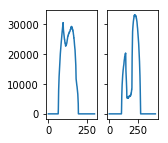

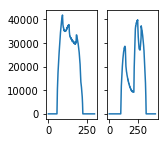

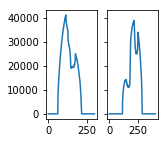

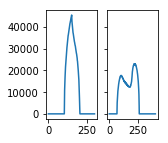

7


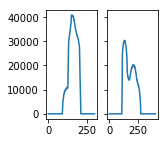

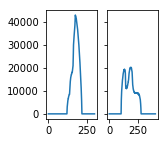

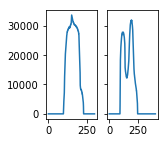

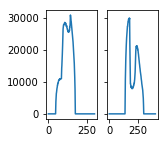

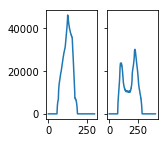

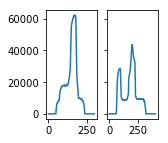

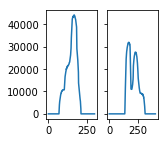

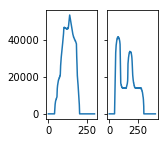

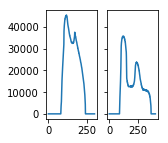

8


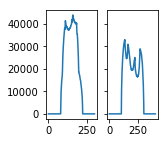

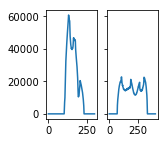

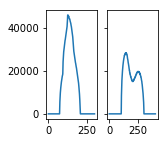

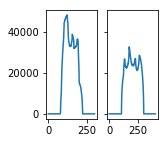

9


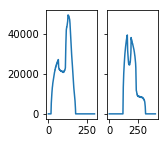

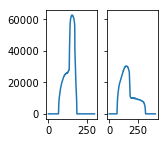

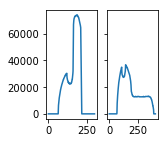

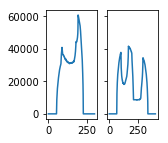

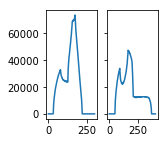

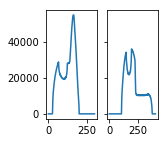

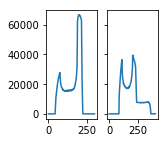

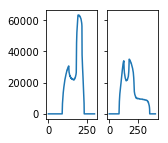

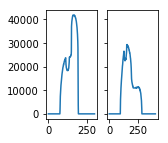

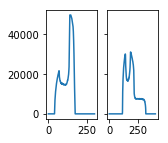

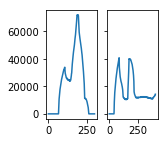

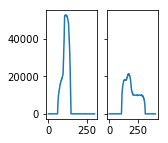

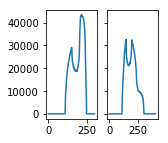

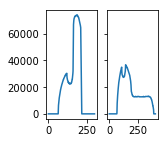

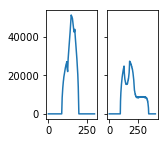

In [141]:
import matplotlib.pyplot as plt 

x_1 = np.arange(v.shape[1])
x_2 = np.arange(u.shape[1])

for c in np.unique(clases):
    print(c)
    for cl, vv, uu in zip(clases,v,u):
        if cl ==c:
            f, ax = plt.subplots(1, 2, sharey=True,figsize=(2,2))
            ax[0].plot(x_1,vv)
            ax[1].plot(x_2,uu)
            plt.show()
            plt.close()
    

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

last_index_train = 70
dataset_train = dataset.T[:last_index_train]
clases_train = clases[:last_index_train]
dataset_test = dataset.T[last_index_train:size_dataset]
clases_test = clases[last_index_train:size_dataset]

model = KNeighborsClassifier(n_neighbors=3)
#model = GaussianNB()
#model = LinearRegression()
model.fit(dataset_train,clases_train)
print(model.score(dataset_test,clases_test))


for row,c in zip(dataset_test,clases_test):
    prediccion = model.predict(row.reshape(1,-1))
    if prediccion == c:
        print("OK clase:" ,c)
    else:
        print("ERR clase:", c, "prediccion",prediccion[0])


0.0666666666667
ERR clase: 5 prediccion 0
ERR clase: 4 prediccion 0
ERR clase: 4 prediccion 0
ERR clase: 5 prediccion 0
ERR clase: 4 prediccion 0
ERR clase: 5 prediccion 0
ERR clase: 2 prediccion 0
ERR clase: 3 prediccion 0
ERR clase: 1 prediccion 0
ERR clase: 9 prediccion 0
ERR clase: 4 prediccion 0
ERR clase: 9 prediccion 0
ERR clase: 2 prediccion 0
ERR clase: 9 prediccion 0
ERR clase: 2 prediccion 0
OK clase: 0
ERR clase: 4 prediccion 0
ERR clase: 8 prediccion 0
ERR clase: 3 prediccion 0
ERR clase: 4 prediccion 0
OK clase: 0
ERR clase: 7 prediccion 0
ERR clase: 7 prediccion 0
ERR clase: 2 prediccion 0
ERR clase: 2 prediccion 0
ERR clase: 5 prediccion 0
ERR clase: 1 prediccion 0
ERR clase: 9 prediccion 0
ERR clase: 1 prediccion 0
ERR clase: 3 prediccion 0
